# EDA y estimaciones sobre Presión Arterial en pacientes

En esta notebook, mostraremos el proceso del análisis exploratorio de datos de pacientes en clínicas/hospitales de Neuquén, Argentina. Haremos enfoque en la presión arterial sistólica y diastólica de cada paciente (TAS y TAD), estimando posibles consecuencias, según los resultados de cada consulta médica realizada.

Alumnos:
- Ortega Cor, Maria Eva
- Rodriguez, Javier Ceferino

## Importación de librerías y configuraciones

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date

In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 13})

## Conociendo el dataset

In [3]:
df = pd.read_csv("./para_ejercitacion_con_RCVG_1.csv", delimiter=";", index_col="idPACIENTE")
print('Shape: ', df.shape)
df.head(10)

Shape:  (59965, 49)


,SEXO,FECHA DE NACIMIENTO,PROV/LOC,LOCALIDAD,UTMA_CONSULTA_SISTEMA,FECHA_UTMA_CONSULTA_VINCULADA,EFECTOR_UTMA_CONSULTA_VINCULADA,ZONA_UTMA_CONSULTA_VINCULADA,DIABETES,DISLIPEMIA,HIPERTENSION,OBESIDAD,ENF. CARDIOVASCULAR ESTABLECIDA,CARDIOPATIA ISQUEMICA,ENF. CEREBROVASCULAR,ENF. ARTERIAL PERIFERICA,LESIONES PIERNA PIE,TAS,TAD,FECHA_UTMA_TA,PESO,TALLA,UTMO_IMC,CLASIFICACION_IMC,FECHA_UTMO_IMC,IMC_REFERENCIA,FECHA_IMC_REFERENCIA,DIFERENCIA_IMC,PORC_VARIACION_IMC,MESES_REFERENCIA,PORC_VARIACION_IMC_ANUALIZADO,HbA1c,FECHA_HbA1c,FECHA_CREATININEMIA,CREATININEMIA,FECHA_CLEARANCE,CLEARANCE,FECHA_RAC,RAC,DANNO_RENAL,ENFERMEDAD RENAL CRONICA,COLESTEROL_TOTAL,FECHA_UTMO_COLESTEROL_TOTAL,COLESTEROL_TOTAL.1,FECHA_UTMO_LDL,FECHA FONDO OJO,RESULTADO FONDO OJO,FECHA NUTRICION,FECHA ODONTO
idPACIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2RIIN10249,FEMENINO,22/01/1928,.,NaN,20/08/2021,06/03/2019,"HOSPITAL PROVINCIAL NEUQUEN ""DR. EDUARDO CAST...",ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,140.0,90.0,27/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/01/2021,0.65,28/01/2021,76.48,NaN,NaN,DR2,NaN,176.00,22/06/2016,124.0,22/06/2016,NaN,NaN,NaN,NaN
2SICA11223,FEMENINO,22/09/1930,ZAPALA,ZAPALA,30/06/2021,05/08/2020,C.S. DON BOSCO,ZONA SANITARIA II,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,170.0,90.0,15/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/12/2019,1.03,28/12/2019,48.14,NaN,NaN,DR3,NaN,152.00,24/05/2017,86.0,24/05/2017,NaN,NaN,30/04/2020,NaN
2FEJO9326,FEMENINO,13/07/1925,.,NaN,05/08/2021,02/09/2019,"HOSPITAL PROVINCIAL NEUQUEN ""DR. EDUARDO CAST...",ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/09/2019,0.90,02/09/2019,54.76,NaN,NaN,DR3,NaN,264.00,08/07/2013,NaN,NaN,NaN,NaN,NaN,NaN
2MOAL10536,FEMENINO,04/11/1928,CONFLUENCIA,NEUQUEN,30/04/2021,27/04/2021,HOSPITAL BOUQUET ROLDAN,ZONA SANITARIA METROPOLITANA,DM2,NO,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/04/2021,1.81,08/04/2021,24.90,NaN,NaN,DR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2MUAN8668,FEMENINO,24/09/1923,CONFLUENCIA,NEUQUEN,21/05/2019,18/01/2018,C.S. LAS PIEDRITAS,ZONA SANITARIA IV,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20/05/2019,1.53,20/05/2019,28.61,NaN,NaN,DR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CHFR10797,FEMENINO,23/07/1929,.,NaN,15/03/2018,15/03/2018,HOSPITAL JUNIN DE LOS ANDES,ZONA SANITARIA IV,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2HELI8172,FEMENINO,16/05/1922,CONFLUENCIA,NEUQUEN,28/07/2021,16/01/2019,HOSPITAL CUTRAL CO-PLAZA HUINCUL,ZONA SANITARIA V,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/01/2020,0.81,30/01/2020,60.88,NaN,NaN,DR2,NaN,148.88,22/07/2016,NaN,NaN,NaN,NaN,NaN,NaN
2BEPA7832,FEMENINO,10/06/1921,CONFLUENCIA,VILLA EL CHOCON,09/02/2018,09/02/2018,HOSPITAL EL CHOCON,ZONA SANITARIA V,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2MAMA8965,FEMENINO,17/07/1924,CONFLUENCIA,NEUQUEN,24/06/2020,15/02/2019,HOSPITAL HORACIO HELLER,ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,110.0,70.0,04/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/08/2020,0.82,07/08/2020,118.55,NaN,NaN,DR1,NaN,130.00,30/11/2015,63.0,30/11/2015,NaN,NaN,NaN,NaN


In [4]:
', '.join(df.columns)

'SEXO, FECHA DE NACIMIENTO, PROV/LOC, LOCALIDAD, UTMA_CONSULTA_SISTEMA, FECHA_UTMA_CONSULTA_VINCULADA, EFECTOR_UTMA_CONSULTA_VINCULADA, ZONA_UTMA_CONSULTA_VINCULADA, DIABETES, DISLIPEMIA, HIPERTENSION, OBESIDAD, ENF. CARDIOVASCULAR ESTABLECIDA, CARDIOPATIA ISQUEMICA, ENF. CEREBROVASCULAR, ENF. ARTERIAL PERIFERICA, LESIONES PIERNA PIE, TAS, TAD, FECHA_UTMA_TA, PESO, TALLA, UTMO_IMC, CLASIFICACION_IMC, FECHA_UTMO_IMC, IMC_REFERENCIA, FECHA_IMC_REFERENCIA, DIFERENCIA_IMC, PORC_VARIACION_IMC, MESES_REFERENCIA, PORC_VARIACION_IMC_ANUALIZADO, HbA1c, FECHA_HbA1c, FECHA_CREATININEMIA, CREATININEMIA, FECHA_CLEARANCE, CLEARANCE, FECHA_RAC, RAC, DANNO_RENAL, ENFERMEDAD RENAL CRONICA, COLESTEROL_TOTAL, FECHA_UTMO_COLESTEROL_TOTAL, COLESTEROL_TOTAL.1, FECHA_UTMO_LDL, FECHA FONDO OJO, RESULTADO FONDO OJO, FECHA NUTRICION, FECHA ODONTO'

### Columnas del dataset

Columna | Descripción
---|---
SEXO | Género del paciente
FECHA DE NACIMIENTO | Fecha de nacimiento en formato DD/MM/AAAA
PROV/LOC | Provincia o Localidad
LOCALIDAD | Localidad
UTMA_CONSULTA_SISTEMA | Última consulta registrada en el sistema en formato DD/MM/AAAA
FECHA_UTMA_CONSULTA_VINCULADA | Última consulta vinculada en formato DD/MM/AAAA
EFECTOR_UTMA_CONSULTA_VINCULADA | Establecimiento de la última consulta vinculada
ZONA_UTMA_CONSULTA_VINCULADA | Zona correspondiente de la última consulta vinculada
DIABETES | Tipo de diabétes
DISLIPEMIA | Niveles excesivamente elevados de colesterol o grasas (lípidos) en la sangre (SI o NO)
HIPERTENSION | Afección en la que la presión de la sangre hacia las paredes de la arteria es demasiado alta (SI o NO)
OBESIDAD | Trastorno caracterizado por niveles excesivos de grasa corporal que aumentan el riesgo de tener problemas de salud (SI o NO)
ENF. CARDIOVASCULAR ESTABLECIDA | Pacientes en riesgo alto y muy alto de un evento cardiaco-vascular (SI o NO)
CARDIOPATIA ISQUEMICA | Lesión o enfermedad en los principales vasos sanguíneos del corazón (NaN o SI)
ENF. CEREBROVASCULAR | Lesión en el cerebro ocasionada por la interrupción de la irrigación sanguínea (NaN o SI)
ENF. ARTERIAL PERIFERICA | Afección circulatoria en la que el estrechamiento de los vasos sanguíneos reduce la irrigación sanguínea a los miembros (NaN o SI)
LESIONES PIERNA PIE | Lesiones en la pierna o pie (NaN o SI)
TAS | (Presión Arterial Sistólica) Presión causada cuando el corazón se contrae y empuja la sangre hacia afuera
TAD | (Presión Arterial Diastólica) Presión que ocurre cuando el corazón se relaja y se llena de sangre
FECHA_UTMA_TA | Fecha de última medición de tensión arterial en formato DD/MM/AAAA
PESO | Peso del paciente (kg)
TALLA | Altura del paciente (metros)
UTMO_IMC | Último IMC calculado
CLASIFICACION_IMC | Clasificación del IMC
FECHA_UTMO_IMC | Fecha del último IMC calculado
IMC_REFERENCIA | IMC de referencia
FECHA_IMC_REFERENCIA | Fecha del IMC de referencia
DIFERENCIA_IMC | Diferencia entre IMC calculado y el IMC de referencia
PORC_VARIACION_IMC | ???
MESES_REFERENCIA | ???
PORC_VARIACION_IMC_ANUALIZADO | ???
HbA1c | Prueba de Hemoglobina Glicosilada (HbA1c)
FECHA_HbA1c | Fecha de último examen de hbA1c
FECHA_CREATININEMIA | Fecha de último examen de creatininemia
CREATININEMIA | Examen de sangre que mide la concentración de creatinina en sangre
FECHA_CLEARANCE | Fecha de último examen de clearence
CLEARANCE | Examen de depuración de la creatinina
FECHA_RAC | Fecha de último examen de RAC
RAC | Examen de RAC (microalbuminuria)
DANNO_RENAL | Tipo de daño renal
ENFERMEDAD RENAL CRONICA | Estadío de enfermedad renal crónica
COLESTEROL_TOTAL | Examen de colesterol (HDL)
FECHA_UTMO_COLESTEROL_TOTAL | Fecha de último examen de colesterol (HDL)
COLESTEROL_TOTAL.1 | Examen de colesterol (LDL)
FECHA_UTMO_LDL | Fecha de último examen de colesterol (LDL)
FECHA FONDO OJO | Fecha de último fondo de ojo
RESULTADO FONDO OJO | Resultado de fondo de ojo
FECHA NUTRICION | Fecha de última visita a nutricionista
FECHA ODONTO | Fecha de última visita a odontólogo

In [5]:
interest = [
    "SEXO", "DIABETES", "DISLIPEMIA", "HIPERTENSION", "OBESIDAD", "ENF. CARDIOVASCULAR ESTABLECIDA",
    "CARDIOPATIA ISQUEMICA", "ENF. CEREBROVASCULAR", "ENF. ARTERIAL PERIFERICA", "LESIONES PIERNA PIE",
    "CLASIFICACION_IMC", "DANNO_RENAL", "ENFERMEDAD RENAL CRONICA"
]
for col in df:
    if col in interest:
        print(f"{col}: ", df[col].unique())

SEXO:  ['FEMENINO' 'MASCULINO']
DIABETES:  ['NO' 'DM2' 'DM1']
DISLIPEMIA:  ['NO' 'SI']
HIPERTENSION:  ['SI' 'NO']
OBESIDAD:  ['NO' 'SI']
ENF. CARDIOVASCULAR ESTABLECIDA:  ['NO' 'SI']
CARDIOPATIA ISQUEMICA:  [nan 'SI']
ENF. CEREBROVASCULAR:  [nan 'SI']
ENF. ARTERIAL PERIFERICA:  [nan 'SI']
LESIONES PIERNA PIE:  [nan 'SI']
CLASIFICACION_IMC:  [nan 'NORMAL' 'OBESIDAD' 'SOBREPESO' 'BAJO PESO']
DANNO_RENAL:  ['DR2' 'DR3' 'DR4' nan 'DR1' 'DR5']
ENFERMEDAD RENAL CRONICA:  [nan 'ERC SIN DATO DE ESTADIO' 'ESTADIO 4' 'ESTADIO 2' 'ESTADIO 3'
 'ESTADIO 5' 'ESTADIO 1']


In [6]:
df = df.drop(columns=['PROV/LOC', 'LOCALIDAD', 'UTMA_CONSULTA_SISTEMA', 'FECHA_UTMA_CONSULTA_VINCULADA', 'EFECTOR_UTMA_CONSULTA_VINCULADA', 'ZONA_UTMA_CONSULTA_VINCULADA', 'DISLIPEMIA', 'LESIONES PIERNA PIE', 'FECHA_UTMA_TA', 'FECHA_UTMO_IMC', 'FECHA_IMC_REFERENCIA', 'PORC_VARIACION_IMC', 'MESES_REFERENCIA', 'PORC_VARIACION_IMC_ANUALIZADO', 'HbA1c', 'FECHA_HbA1c', 'FECHA_CREATININEMIA', 'FECHA_CLEARANCE', 'FECHA_RAC', 'FECHA_UTMO_COLESTEROL_TOTAL', 'FECHA_UTMO_LDL', 'FECHA FONDO OJO', 'RESULTADO FONDO OJO', 'FECHA ODONTO', 'CLEARANCE'])

# EDA

Arrancamos por adicionar una nueva columna "TENSION ARTERIAL TIPO" para obtener el nuevo rango de valores de hipertensión

In [31]:
order_tension=["Normal", "Prehipertensión", "Hipertensión Estadio 1", "Hipertensión Estadio 2"]
def tension_arterial_cond(data):
    if (data["TAS"] < 120) and (data["TAD"] < 80):
        return "Normal"
    if (120 <= data["TAS"] <= 139) or (80 <= data["TAD"] <= 89):
        return "Prehipertensión"
    if (140 <= data["TAS"] <= 159) or (90 <= data["TAD"] <= 99):
        return "Hipertensión Estadio 1"
    if (data["TAS"] >= 160) or (data["TAD"] >= 100):
        return "Hipertensión Estadio 2"
    # return "Sin datos"

# http://www.valoresnormales.com/p/presion-tension-arterial

In [8]:
df_tension_previa = df.copy().dropna(subset=["TAS", "TAD"])
df_tension = df_tension_previa.copy().loc[(df_tension_previa["TAS"] < 1000) & (df_tension_previa["TAD"] < 600)] # Para eliminar outliers detectados
df_tension["TENSION ARTERIAL TIPO"] = df_tension.apply(tension_arterial_cond, axis=1)
print('Shape: ', df_tension.shape)
df_tension["TENSION ARTERIAL TIPO"].value_counts()

Shape:  (29830, 26)


Prehipertensión           15427
Normal                     8202
Hipertensión Estadio 1     4493
Hipertensión Estadio 2     1708
Name: TENSION ARTERIAL TIPO, dtype: int64

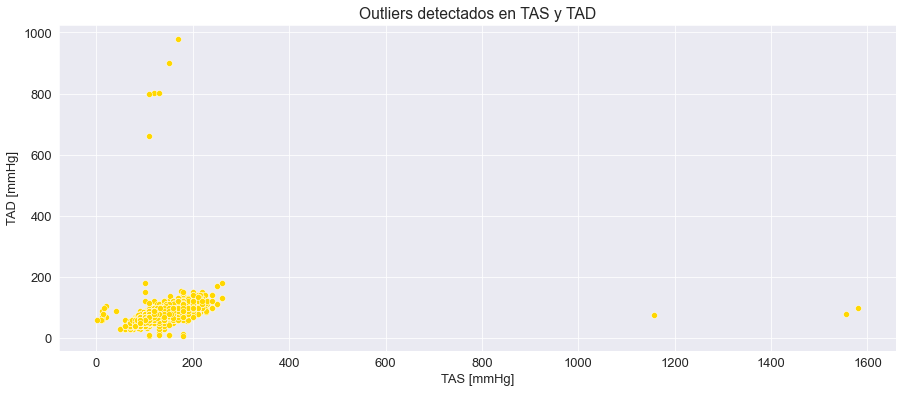

In [27]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_tension_previa, x="TAS", y="TAD", color="gold")
plt.title("Outliers detectados en TAS y TAD")
plt.xlabel("TAS [mmHg]")
plt.ylabel("TAD [mmHg]")

plt.rcParams.update({'font.size': 13})
plt.show()

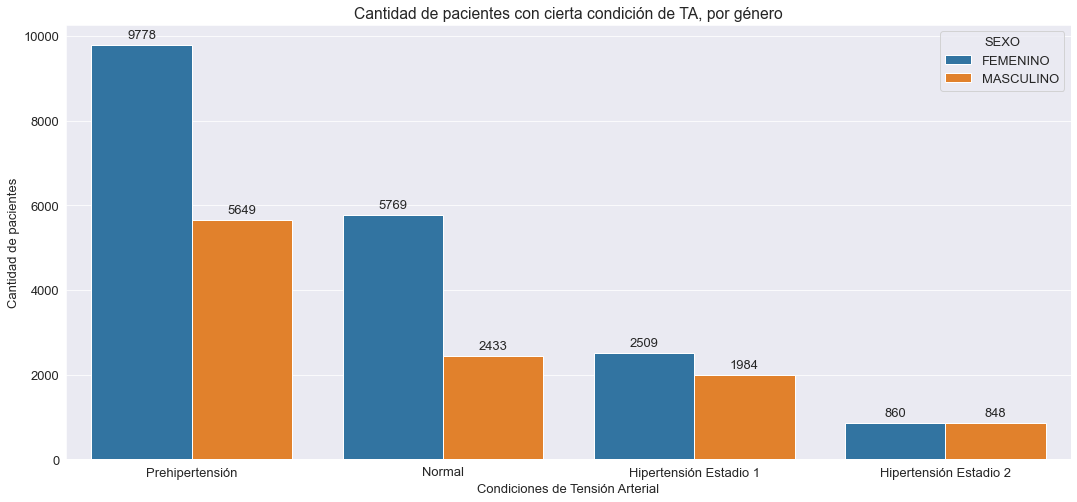

In [30]:
count_tension = df_tension["TENSION ARTERIAL TIPO"].value_counts()

plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(18, 8))
cplot = sns.countplot(data=df_tension, x="TENSION ARTERIAL TIPO", order=count_tension.index, hue="SEXO")
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.title("Cantidad de pacientes con cierta condición de TA, por género")
plt.xlabel("Condiciones de Tensión Arterial")
plt.ylabel("Cantidad de pacientes")
plt.rcParams.update({'font.size': 13})
plt.show()

Ahora veremos la correlación existente entre variables numérica. En particular nos interesan las que tengan mayor correlación con TAS y TAD

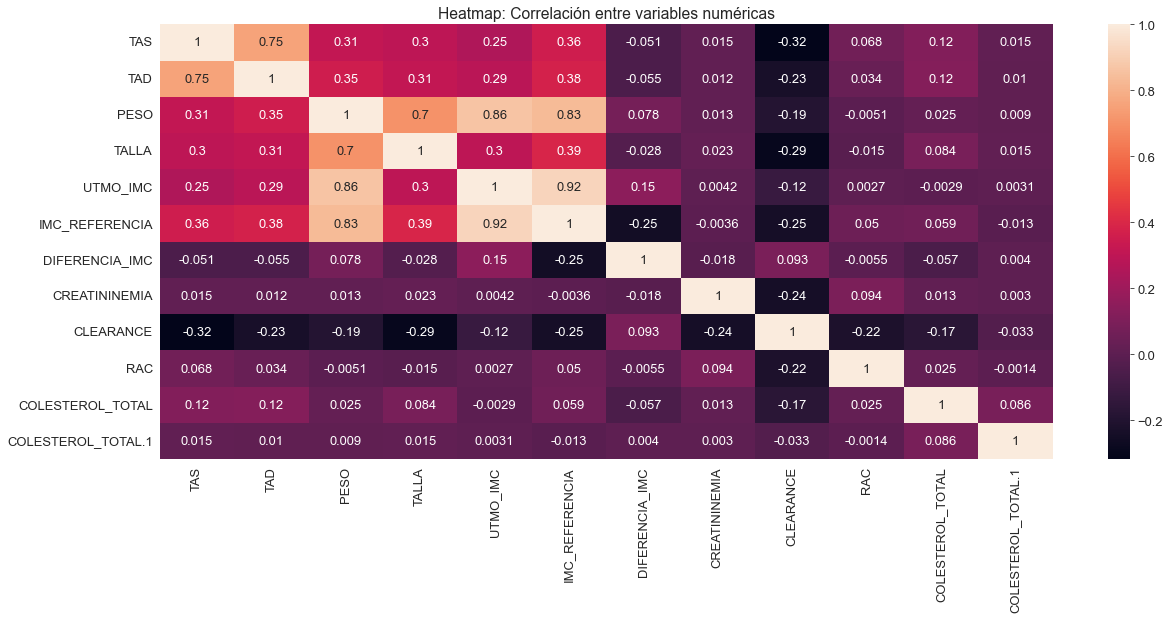

In [11]:
corr = df_tension.corr()
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)
plt.title("Heatmap: Correlación entre variables numéricas")
plt.show()

In [12]:
# lm1 = sns.lmplot(data=df_tension, y="TAS", x="PESO", col="SEXO", row="TENSION ARTERIAL TIPO", hue="TENSION ARTERIAL TIPO", aspect=2, line_kws={"lw":5}, row_order=order_tension)
# lm1.fig.suptitle("Tensión Arterial Sistólica vs Peso, según el sexo y si tiene Hipertensión")
# lm1.fig.subplots_adjust(top=.95)

# lm2 = sns.lmplot(data=df_tension, y="TAD", x="PESO", col="SEXO", row="TENSION ARTERIAL TIPO", hue="TENSION ARTERIAL TIPO", aspect=2, line_kws={"lw":5}, row_order=order_tension)
# lm2.fig.suptitle("Tensión Arterial Diastólica vs Peso, según el sexo")
# lm2.fig.subplots_adjust(top=.95)

# plt.show()

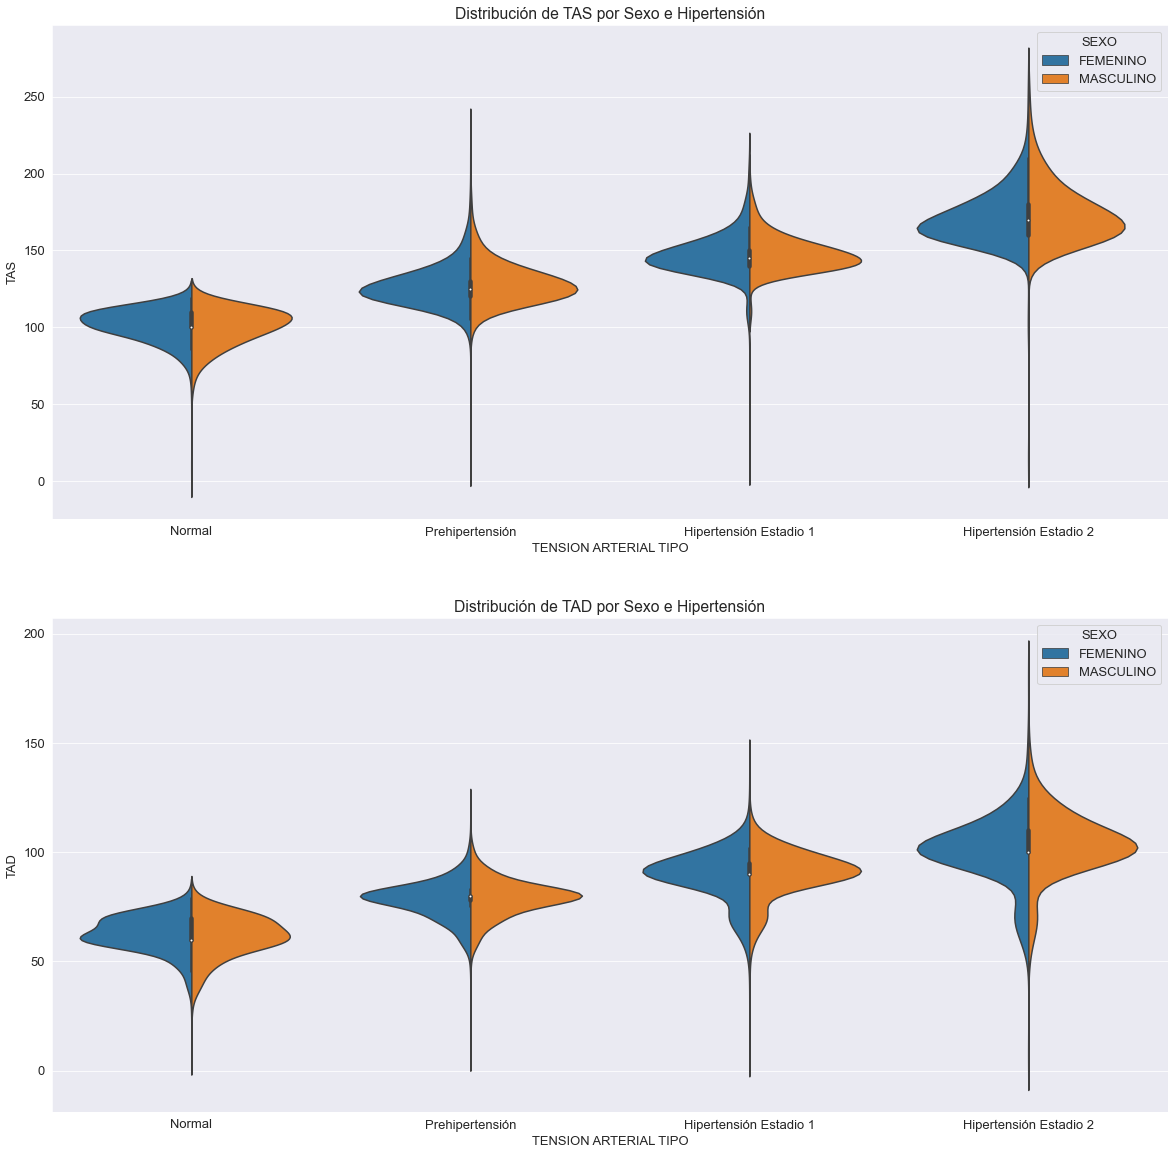

In [13]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
sns.violinplot(data=df_tension, y="TAS", hue="SEXO", x="TENSION ARTERIAL TIPO", split=True, order=order_tension, bw=.6)
plt.title("Distribución de TAS por Sexo e Hipertensión")

plt.subplot(2, 1, 2)
sns.violinplot(data=df_tension, y="TAD", hue="SEXO", x="TENSION ARTERIAL TIPO", split=True, order=order_tension, bw=.6)
plt.title("Distribución de TAD por Sexo e Hipertensión")

plt.show()

Con las distribuciones hechas para TAS y TAD, es notable la tendencia de la presión ante distintos tipos de hipertención.

La Organización Mundial de la Salud menciona varias observaciones y factores que producen hipertención, algunas son:
- En el mundo, hay 1280 millones de personas adultas entre 30 a 78 años con hipertensión
- La hipertensión se diagnostica y trata al 42% de los adultos que la padecen
- Apenas uno de cada cinco adultos hipertensos (21%) tiene controlado el problema
- Complicaciones en hipertensión no controlada:
    - Dolor torácico
    - Infarto de miocardio
    - Insuficiencia cardiaca
    - Ritmo cardiaco irregular
    - Daños renales

Comprobamos primero los porcentajes de pacientes adultos, para saber si coincide con lo que tenemos en el dataset

In [14]:
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [15]:
# Filtramos por personas adultas entre 30 y 78 años
df_tension['EDAD'] = df_tension['FECHA DE NACIMIENTO'].apply(age)
df_adultos = df_tension.loc[(df_tension['EDAD'] >= 30) & (df_tension['EDAD'] <= 78)]
shape_adultos = df_adultos.shape
shape_adultos

(22383, 27)

In [16]:
# Supongamos que los adultos que tienen controlada la hipertensión fueron aunque sea una vez al nutricionista
df_control = df_adultos.loc[(df_adultos['FECHA NUTRICION'].notnull()) & (df_adultos['TENSION ARTERIAL TIPO'] != 'Normal')]
shape_adultos_controlado = df_control.shape
shape_adultos_controlado

(4338, 27)

In [17]:
print(f"Procentaje de adultos con hipertensión controlada: {shape_adultos_controlado[0] * 100 / (shape_adultos[0] + shape_adultos_controlado[0]):.2f}%")

Procentaje de adultos con hipertensión controlada: 16.23%


La premisa de que 1 de cada 5 personas no se cumple en este caso, pero es probable que sea por limitar nuestro análisis en Neuquén solamente.
Para nuestro caso, sería "1 de cada 6 personas". Veamos ahora los casos de personas sin control de la hipertensión.

In [18]:
df_no_control = df_adultos.loc[(df_adultos['FECHA NUTRICION'].isnull())]
df_no_control.shape

(16825, 27)

In [19]:
df_no_control.head()

,SEXO,FECHA DE NACIMIENTO,DIABETES,HIPERTENSION,OBESIDAD,ENF. CARDIOVASCULAR ESTABLECIDA,CARDIOPATIA ISQUEMICA,ENF. CEREBROVASCULAR,ENF. ARTERIAL PERIFERICA,TAS,TAD,PESO,TALLA,UTMO_IMC,CLASIFICACION_IMC,IMC_REFERENCIA,DIFERENCIA_IMC,CREATININEMIA,CLEARANCE,RAC,DANNO_RENAL,ENFERMEDAD RENAL CRONICA,COLESTEROL_TOTAL,COLESTEROL_TOTAL.1,FECHA NUTRICION,TENSION ARTERIAL TIPO,EDAD
idPACIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,
1BEAL18264,MASCULINO,01/01/1950,NO,SI,NO,NO,NaN,NaN,NaN,130.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prehipertensión,72
2LUMA17005,FEMENINO,22/07/1946,DM2,SI,NO,NO,NaN,NaN,NaN,110.0,70.0,75.5,1.44,36.41,OBESIDAD,NaN,NaN,2.52,18.52,NaN,DR4,NaN,125.0,73.0,NaN,Normal,76
2VIJU16242,FEMENINO,19/06/1944,DM2,NO,NO,NO,NaN,NaN,NaN,140.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,0.94,60.60,NaN,DR2,NaN,158.0,NaN,NaN,Hipertensión Estadio 1,78
2SAMA16192,FEMENINO,30/04/1944,NO,SI,NO,NO,NaN,NaN,NaN,110.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,221.0,129.0,NaN,Normal,78
2SAMA16923,FEMENINO,01/05/1946,DM2,NO,SI,NO,NaN,NaN,NaN,130.0,60.0,101.0,1.58,40.46,OBESIDAD,NaN,NaN,0.80,76.34,1.0,DR2,NaN,131.0,51.0,NaN,Prehipertensión,76


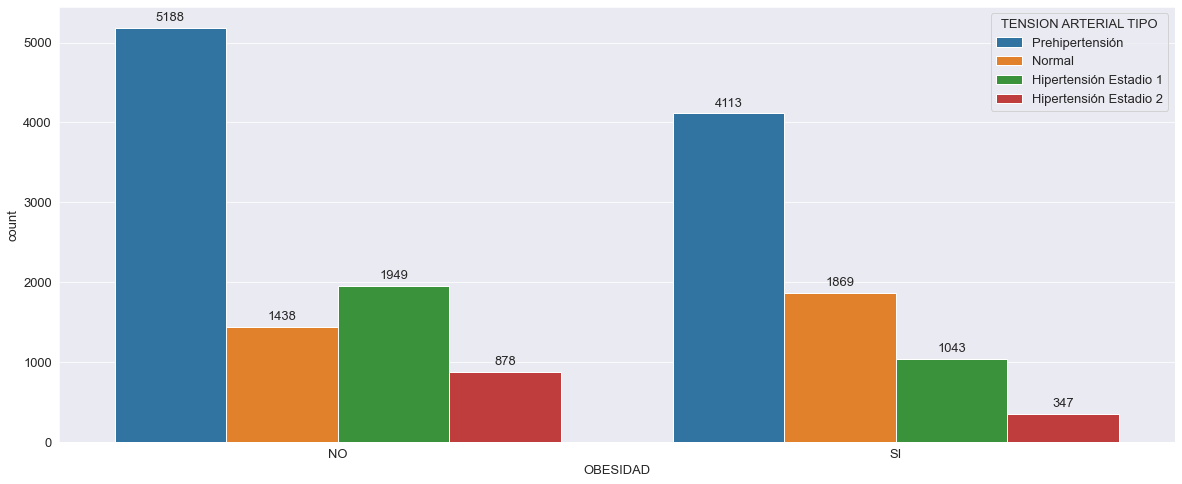

In [20]:
plt.figure(figsize=(20, 8))
cplot = sns.countplot(data=df_no_control, x="OBESIDAD", hue="TENSION ARTERIAL TIPO")
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.show()

In [21]:
df_no_control = df_no_control.fillna(value={"DANNO_RENAL": "NO"})
df_no_control.DANNO_RENAL.unique()

array(['NO', 'DR4', 'DR2', 'DR3', 'DR1', 'DR5'], dtype=object)

In [95]:
df_danno_hta = df_no_control[["TENSION ARTERIAL TIPO", "DANNO_RENAL"]]
df_danno_hta['TENSION ARTERIAL TIPO'] = pd.CategoricalIndex(df_danno_hta['TENSION ARTERIAL TIPO'], ordered=True, categories=["Normal", "Prehipertensión", "Hipertensión Estadio 1", "Hipertensión Estadio 2"])
df_danno_hta

C:\Users\Javo\AppData\Local\Temp\ipykernel_17272\2640339762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_danno_hta['TENSION ARTERIAL TIPO'] = pd.CategoricalIndex(df_danno_hta['TENSION ARTERIAL TIPO'], ordered=True, categories=["Normal", "Prehipertensión", "Hipertensión Estadio 1", "Hipertensión Estadio 2"])


,TENSION ARTERIAL TIPO,DANNO_RENAL
idPACIENTE,,
1BEAL18264,Prehipertensión,NO
2LUMA17005,Normal,DR4
2VIJU16242,Hipertensión Estadio 1,DR2
2SAMA16192,Normal,NO
2SAMA16923,Prehipertensión,DR2
...,...,...
2ROVI26360,Hipertensión Estadio 2,DR2
2TOIR17545,Prehipertensión,DR3
2MECE20267,Prehipertensión,DR3


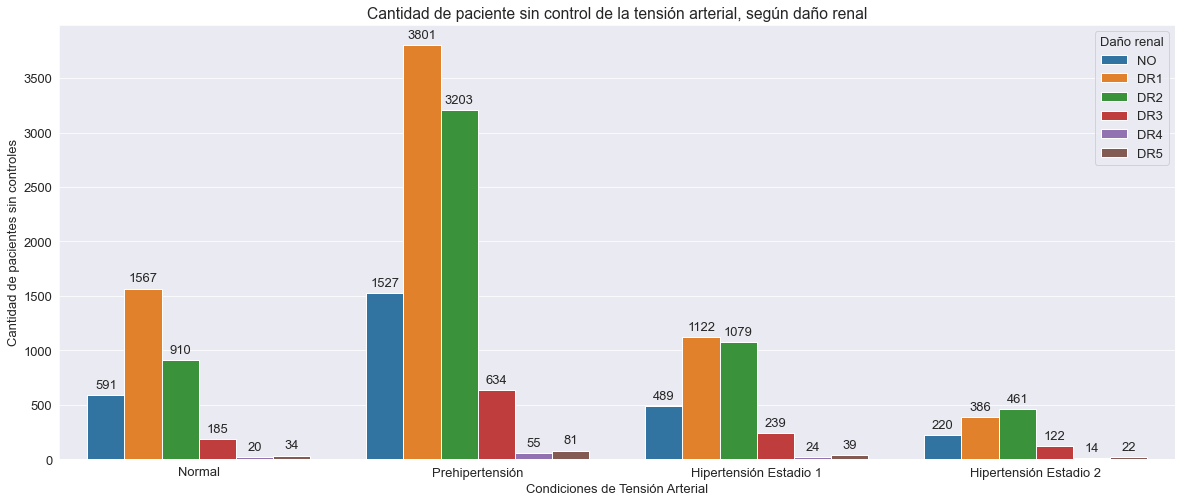

In [96]:
danno_order = ['NO', 'DR1', 'DR2', 'DR3', 'DR4', 'DR5']

plt.figure(figsize=(20, 8))
cplot = sns.countplot(data=df_danno_hta, hue="DANNO_RENAL", x="TENSION ARTERIAL TIPO", hue_order=danno_order)
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.title("Cantidad de paciente sin control de la tensión arterial, según daño renal")
plt.xlabel("Condiciones de Tensión Arterial")
plt.ylabel("Cantidad de pacientes sin controles")
plt.legend(title="Daño renal")
plt.show()

In [97]:
cross_tab_prop = pd.crosstab(index=df_danno_hta["TENSION ARTERIAL TIPO"], columns=df_danno_hta["DANNO_RENAL"], normalize="index") * 100
cross_tab_prop = cross_tab_prop.reindex(["Normal", "Prehipertensión", "Hipertensión Estadio 1", "Hipertensión Estadio 2"])
cross_tab_prop

DANNO_RENAL,DR1,DR2,DR3,DR4,DR5,NO
TENSION ARTERIAL TIPO,,,,,,
Normal,47.384336,27.517387,5.594194,0.604778,1.028122,17.871182
Prehipertensión,40.866573,34.437157,6.816471,0.591334,0.870874,16.417590
Hipertensión Estadio 1,37.500000,36.062834,7.987968,0.802139,1.303476,16.343583
Hipertensión Estadio 2,31.510204,37.632653,9.959184,1.142857,1.795918,17.959184


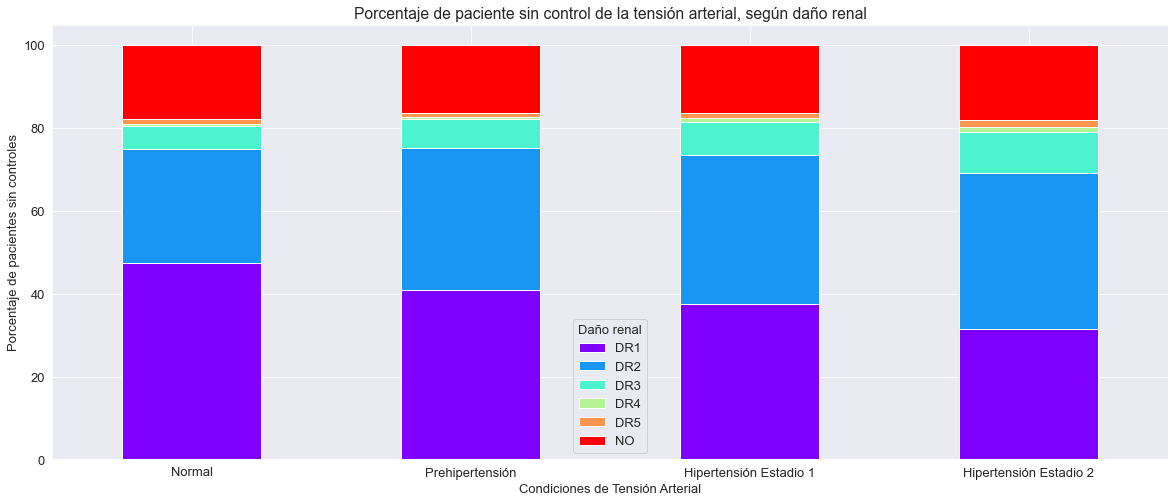

In [107]:
cross_tab_prop.plot(kind="bar", stacked=True, colormap="rainbow", figsize=(20, 8))
plt.xticks(rotation=0)
plt.title("Porcentaje de paciente sin control de la tensión arterial, según daño renal")
plt.xlabel("Condiciones de Tensión Arterial")
plt.ylabel("Porcentaje de pacientes sin controles")
plt.legend(title="Daño renal")
plt.show()